In [84]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [48]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [50]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [51]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")


H2-S1_STO-3G_singlet               No. terms:  6237     No.qubits:  18   
C1-O1_STO-3G_singlet               No. terms:  4409     No.qubits:  16   
H1-Cl1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H1-Na1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H2-Mg1_STO-3G_singlet              No. terms:  3540     No.qubits:  17   
H1-F1_3-21G_singlet                No. terms:  6852     No.qubits:  18   
H1-Li1_3-21G_singlet               No. terms:  6852     No.qubits:  18   
Be1_STO-3G_singlet                 No. terms:  102      No.qubits:  5    
H1-F1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H1-Li1_STO-3G_singlet              No. terms:  558      No.qubits:  8    
Ar1_STO-3G_singlet                 No. terms:  1465     No.qubits:  13   
F2_STO-3G_singlet                  No. terms:  2229     No.qubits:  15   
H1-O1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H2-Be1_STO-3G_singlet              No.

In [30]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [53]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [60]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [61]:
pre_tap_hamiltonians_relevent

{'Ne1_STO-3G_singlet': {'n_qubits': 10, 'n_terms': 156},
 'H1-F1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 13958},
 'H1-F1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'Mg1_STO-3G_singlet': {'n_qubits': 18, 'n_terms': 3388},
 'H3_3-21G_singlet_1+': {'n_qubits': 12, 'n_terms': 1501},
 'H2-S1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 6246},
 'O2_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 2255},
 'H1-Li1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'H2-Be1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 666},
 'H1-Li1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 8758},
 'H1-Na1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5851},
 'H4-N1_STO-3G_singlet_1+': {'n_qubits': 18, 'n_terms': 6892},
 'H2-Mg1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 4582},
 'H1-He1_STO-3G_singlet': {'n_qubits': 4, 'n_terms': 27},
 'C1-O1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5475},
 'H3-N1_STO-3G_singlet': {'n_qubits': 16, 'n_terms': 4293},
 'H3_STO-3G_singlet_1+': {'n_qubits': 6, 'n_ter

In [62]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [63]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

# Import Myriad Results

In [111]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_CS_VQE_LCU_results[mol_name] = data

In [112]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_CS_VQE_SeqRot_results[mol_name] = data

In [113]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys())) == sorted(list(myriad_CS_VQE_LCU_results.keys()))

True

In [94]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'][1]

{'E': -19.052461923533848,
 'H': {'I': -18.449311216657115,
  'Z': -0.597382175022161,
  'X': 0.08321846052224319}}

# Perform Unitary Partitioning on results

In [91]:
from quchem.Unitary_Partitioning.Graph import Clique_cover_Hamiltonian
import quchem.Misc_functions.conversion_scripts as conv_scr 
from copy import deepcopy

In [100]:
# ### find anti-commuting sets
# unitary_paritioning_LCU={}
# unitary_paritioning_SeqRot={}

# commutativity_flag = 'AC' ## <- defines relationship between sets!!!
# plot_graph = False
# Graph_colouring_strategy='largest_first'


# for mol_key in tqdm(list(myriad_LCU_results.keys())):
    
#     exp_LCU_result = myriad_LCU_results[mol_key]
#     exp_SeqRot_result = myriad_SeqRot_results[mol_key]
    
    
#     anti_commuting_sets_different_H_SeqRot_sizes={}
#     anti_commuting_sets_different_H_LCU_sizes={}
#     for ind_key in myriad_SeqRot_results[mol_key]:
        
#         if isinstance(ind_key, str):
#             continue
        
#         if ind_key==0:
#             # only non-contextual problem
#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]={}
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]={}
#         else:

#             ### LCU
#             H_LCU_dict = myriad_LCU_results[mol_key][ind_key]['H']
#             H_LCU= conv_scr.Get_Openfermion_Hamiltonian(H_LCU_dict)

#             n_qubits = len(list(H_LCU_dict.keys())[0])
#             anti_commuting_sets_LCU = Clique_cover_Hamiltonian(list(H_LCU), 
#                                                          n_qubits, 
#                                                          commutativity_flag, 
#                                                          Graph_colouring_strategy)
            
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]= anti_commuting_sets_LCU
            
#             ### SeqRot
#             H_SeqRot_dict = myriad_SeqRot_results[mol_key][ind_key]['H']
#             H_SeqRot= conv_scr.Get_Openfermion_Hamiltonian(H_SeqRot_dict)
#             anti_commuting_sets_SeqRot = Clique_cover_Hamiltonian(H_SeqRot, 
#                                              n_qubits, 
#                                              commutativity_flag, 
#                                              Graph_colouring_strategy)

#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]= anti_commuting_sets_SeqRot
    
#     unitary_paritioning_LCU[mol_key]= deepcopy(anti_commuting_sets_different_H_LCU_sizes)
#     unitary_paritioning_SeqRot[mol_key]= deepcopy(anti_commuting_sets_different_H_SeqRot_sizes)
#     del anti_commuting_sets_different_H_LCU_sizes
#     del anti_commuting_sets_different_H_SeqRot_sizes

In [99]:
# file_name = 'unitary_partitioned_CSVQE_LCU_results.txt'
# output_path = os.path.join(results_dir, file_name)

# with open(output_path, 'w') as f:
#     print(unitary_paritioning_LCU, file=f)

{'E': -77.76838532328783, 'H': {'': -77.76838532328783}}

In [ ]:
# file_name2 = 'unitary_partitioned_CSVQE_SeqRot_results.txt'
# output_path2 = os.path.join(results_dir, file_name2)

# with open(output_path2, 'w') as f:
#     print(unitary_paritioning_SeqRot, file=f)

# Unitary Partitioning Results

In [106]:
## import LCU results
UP_results_dir = os.path.join(working_dir, 'UnitaryPartitioning_ontop_CSVQE_results')

myriad_UP_LCU_on_CSVQE_LCU = {}
for filename in os.listdir(UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_LCU_CS_VQE_LCU_exp')):
        file_path = os.path.join(UP_results_dir, filename) 
        mol_name = filename[65:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_LCU_on_CSVQE_LCU[mol_name] = data

In [107]:
myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
for filename in os.listdir(UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE_SeqRot_exp')):
        file_path = os.path.join(UP_results_dir, filename) 
        mol_name = filename[71:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = data

H3_3-21G_singlet_1+
H2-O1_STO-3G_singlet
F2_STO-3G_singlet
H1-Li1_STO-3G_singlet
H1-F1_STO-3G_singlet
H2-Be1_STO-3G_singlet
H1-He1_3-21G_singlet_1+
H4-N1_STO-3G_singlet_1+
H2_3-21G_singlet
H1-O1_STO-3G_singlet
H3_STO-3G_singlet_1+
H2_6-31G_singlet
Mg1_STO-3G_singlet
Be1_STO-3G_singlet
N2_STO-3G_singlet


In [109]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3_3-21G_singlet_1+']

{'H3_3-21G_singlet_1+': {0: {'AC_sets': {}, 'E': -3.145134621248515},
  1: {'AC_sets': {0: [-2.396760291393643 []],
    1: [0.748374329854872 [Z0], 0.08999926132008447 [X0]]},
   'E': -3.15052683656787},
  2: {'AC_sets': {0: [-2.4755891752526393 []],
    1: [0.4121054083965848 [Z1], 0.044999630660042235 [X1]],
    2: [0.07882888385899613 [Z0], 0.018513030920596123 [X0]],
    3: [0.044999630660042235 [Z0 X1], 0.33626892145828713 [Z0 Z1]],
    4: [0.018513030920596123 [X0 Z1]]},
   'E': -3.150534143967146},
  3: {'AC_sets': {0: [-2.2726120403851193 []],
    1: [0.171210059690641 [Z0 Z1 Z2],
     0.009256508821746823 [X0 Z1],
     0.022499815212985278 [Z0 X2],
     0.009256515388198895 [X1 Z2]],
    2: [0.17121006033307798 [Z2],
     -0.009256508677548205 [Z0 X1 X2],
     0.022499815212985278 [Z0 Z1 X2],
     -0.009256515388198898 [X0 X2]],
    3: [-0.20297713486752023 [Z0],
     -0.00925650867754831 [X0 Z2],
     -0.009256515388198898 [X0 Z1 X2],
     -0.008394356021463234 [Y0 Y1 Z2]],
 

# Plot Results

In [316]:
def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
                           UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
                           mol_name,  dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    CS_VQE_SeqRot_terms = []
    CS_VQE_SeqRot_error=[]
    
    CS_VQE_LCU_terms = []
    CS_VQE_LCU_error =[]
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_error=[]
    
    for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name].keys()):
        UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
        UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
        UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
        UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
        UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
        UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
        CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
        CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
        CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
        CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
        CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
        CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
        CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
        CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
        CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
        CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    width = 0.2  # the width of the bars
    offset = 0.125 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS_VQE_SeqRot',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS_VQE_LCU',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='UP_SeqRot_ontop_CSVQE',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='UP_LCU_ontop_CSVQE',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='tapered H',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='original H',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS_VQE_SeqRot error', markersize=12)
    ax2.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS_VQE_LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS_VQE_SeqRot + UP_SeqRot error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color="darkorchid",marker="1", linestyle='', label='CS_VQE_LCU + UP_LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

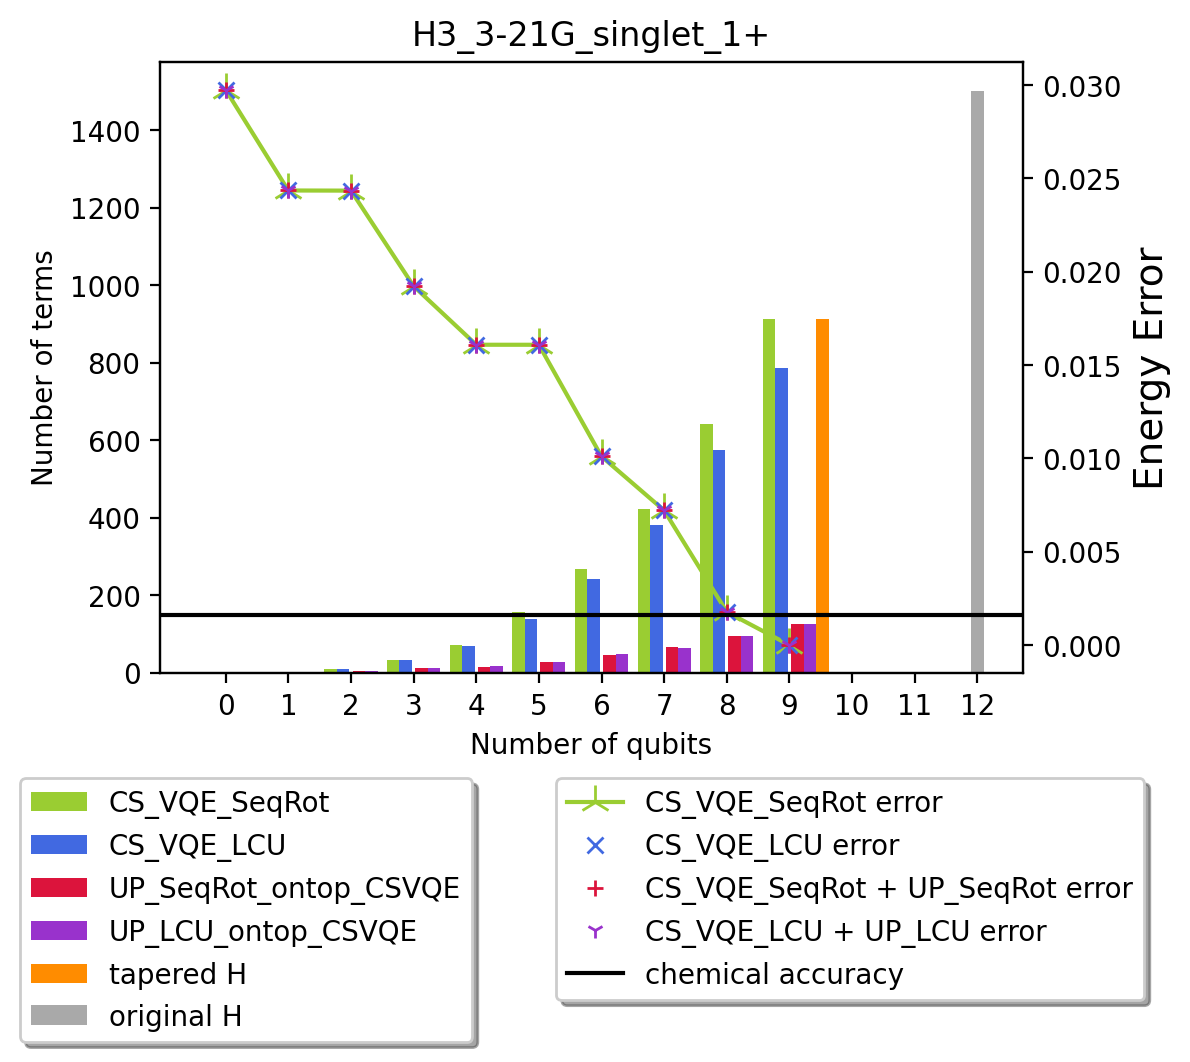

In [317]:
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        'H3_3-21G_singlet_1+',
                       dpi=200)

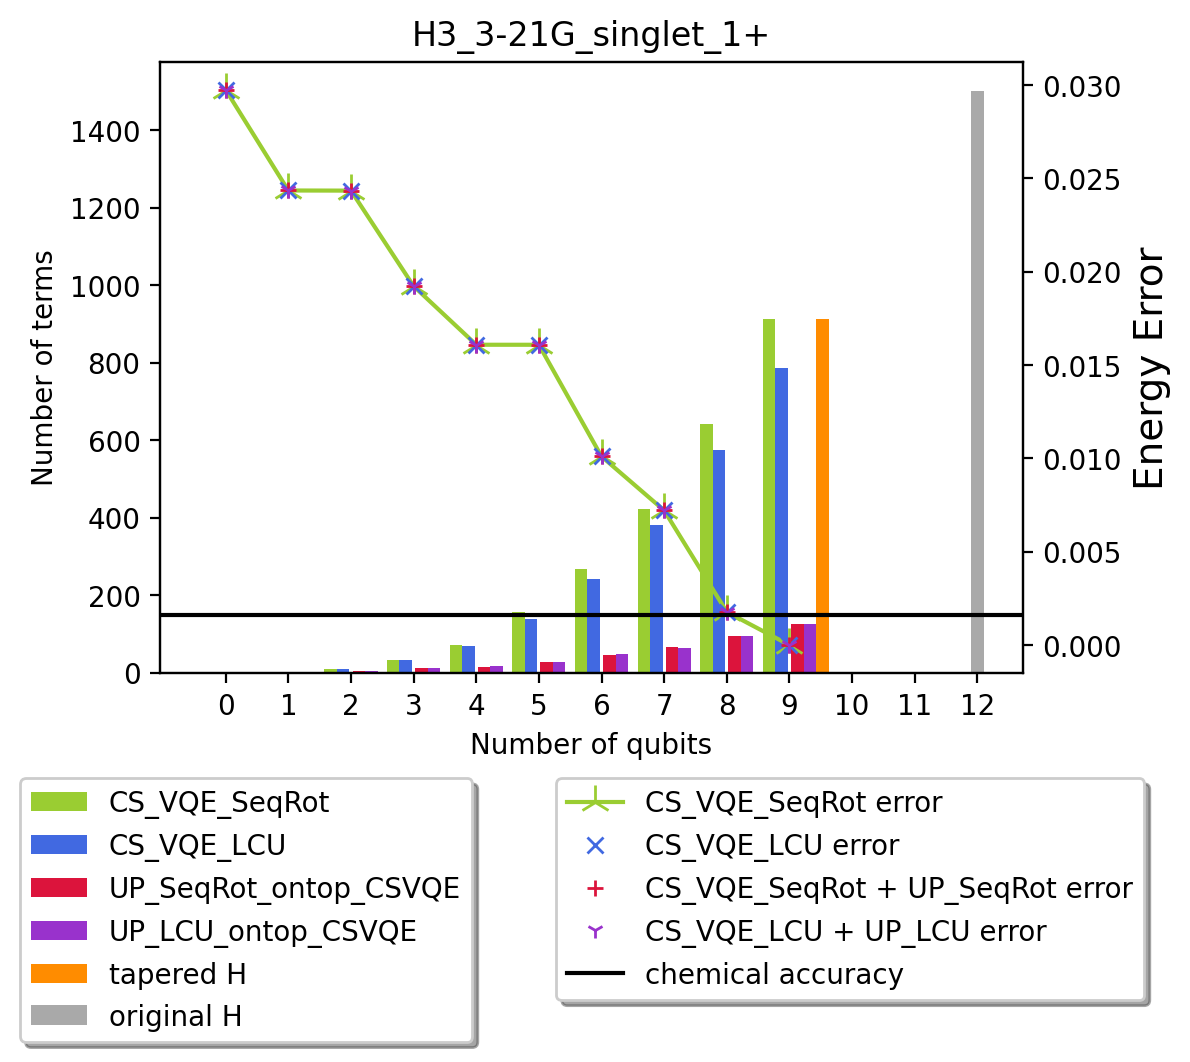

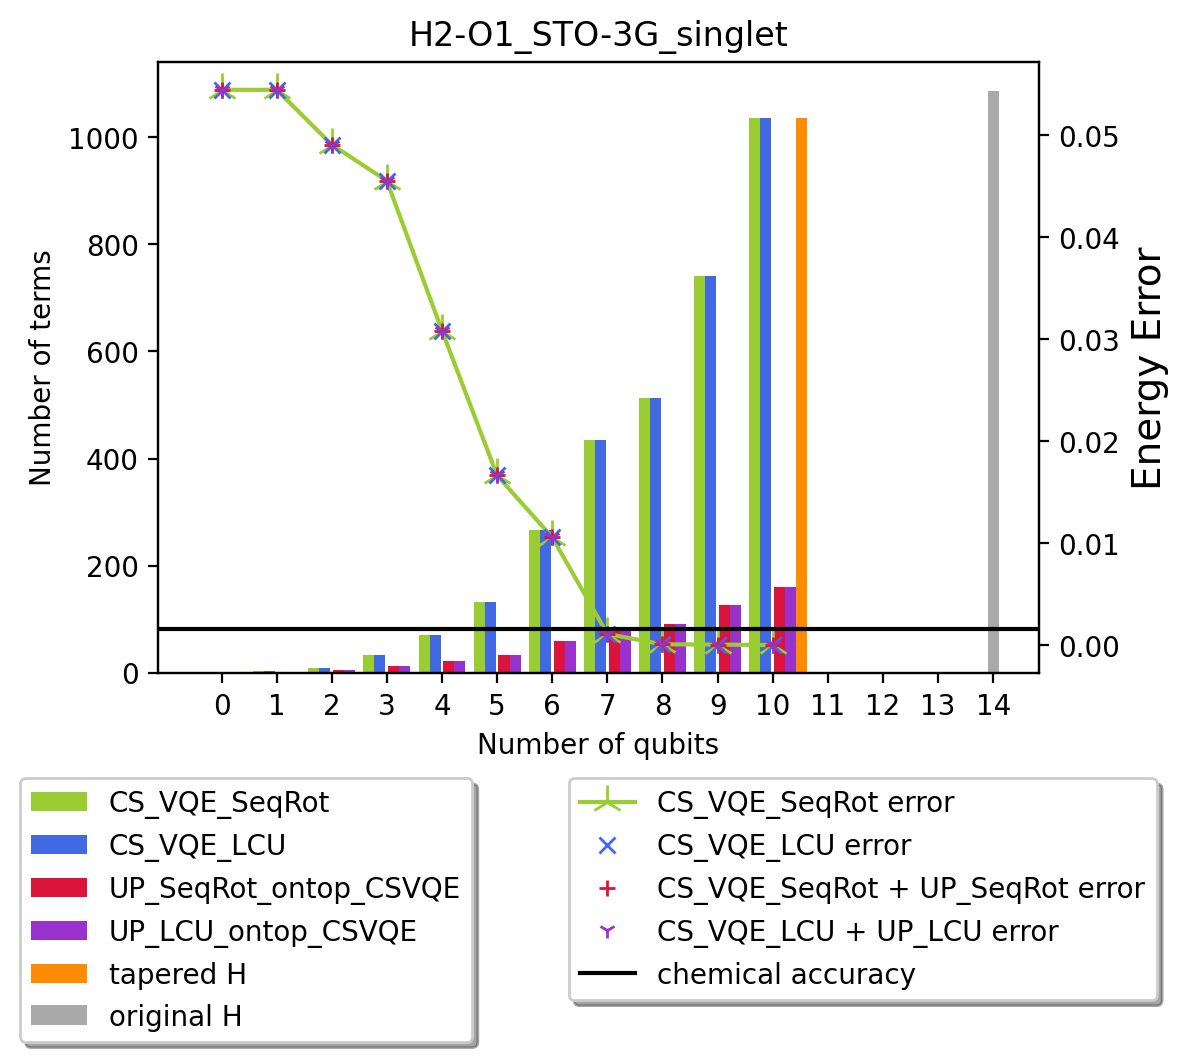

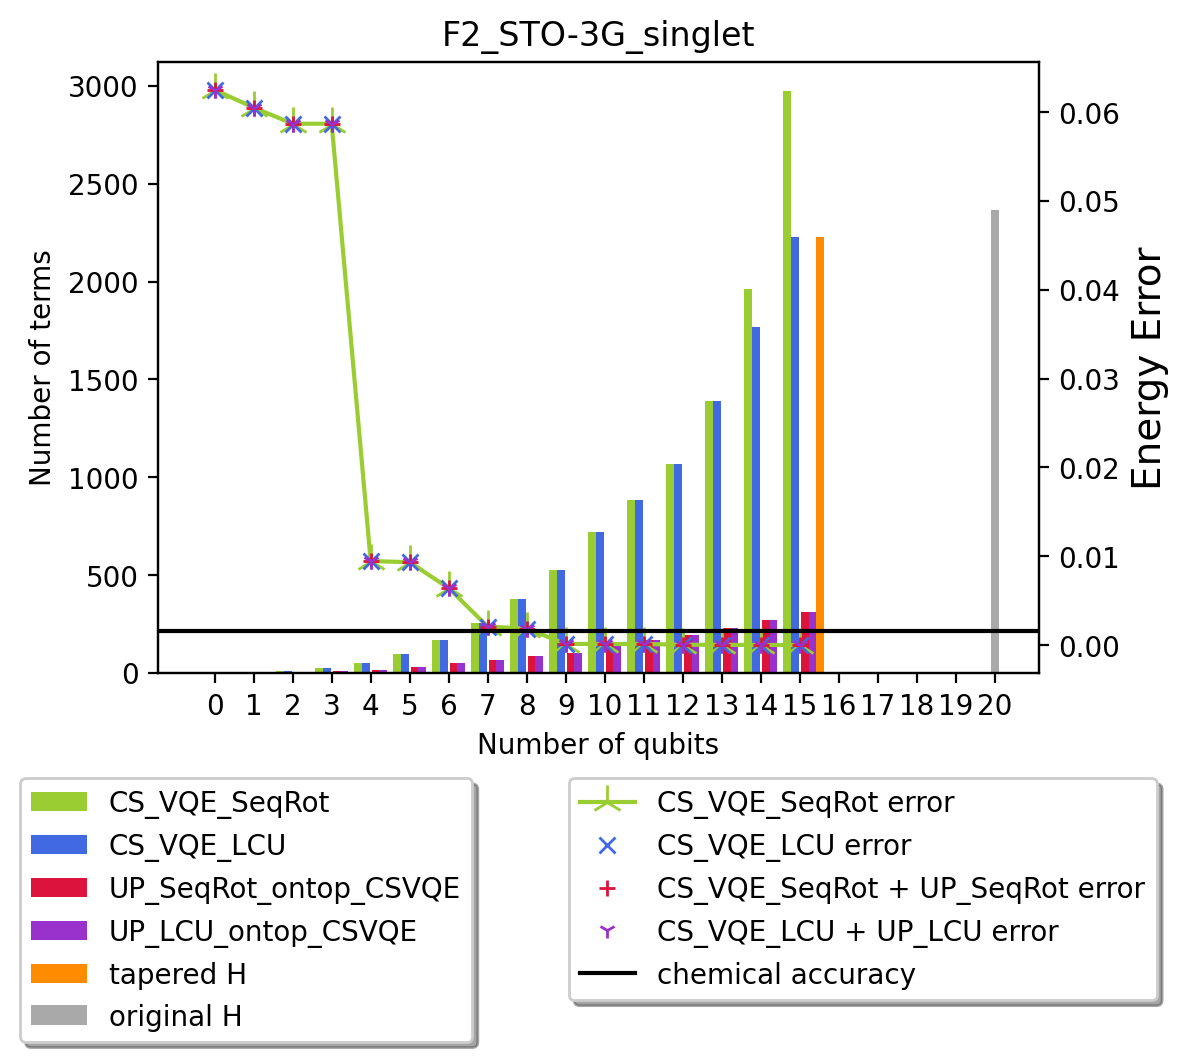

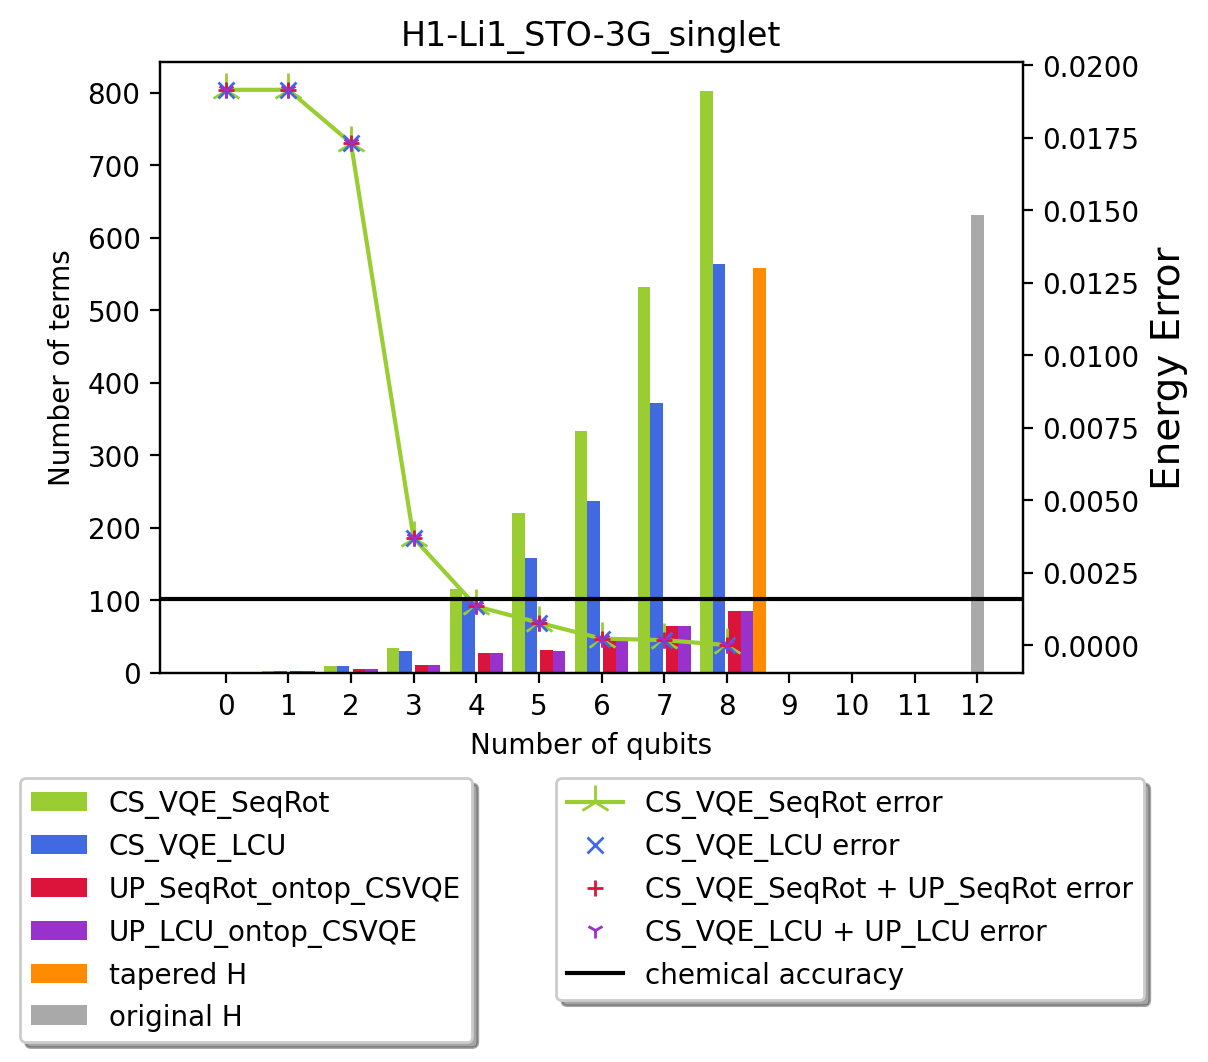

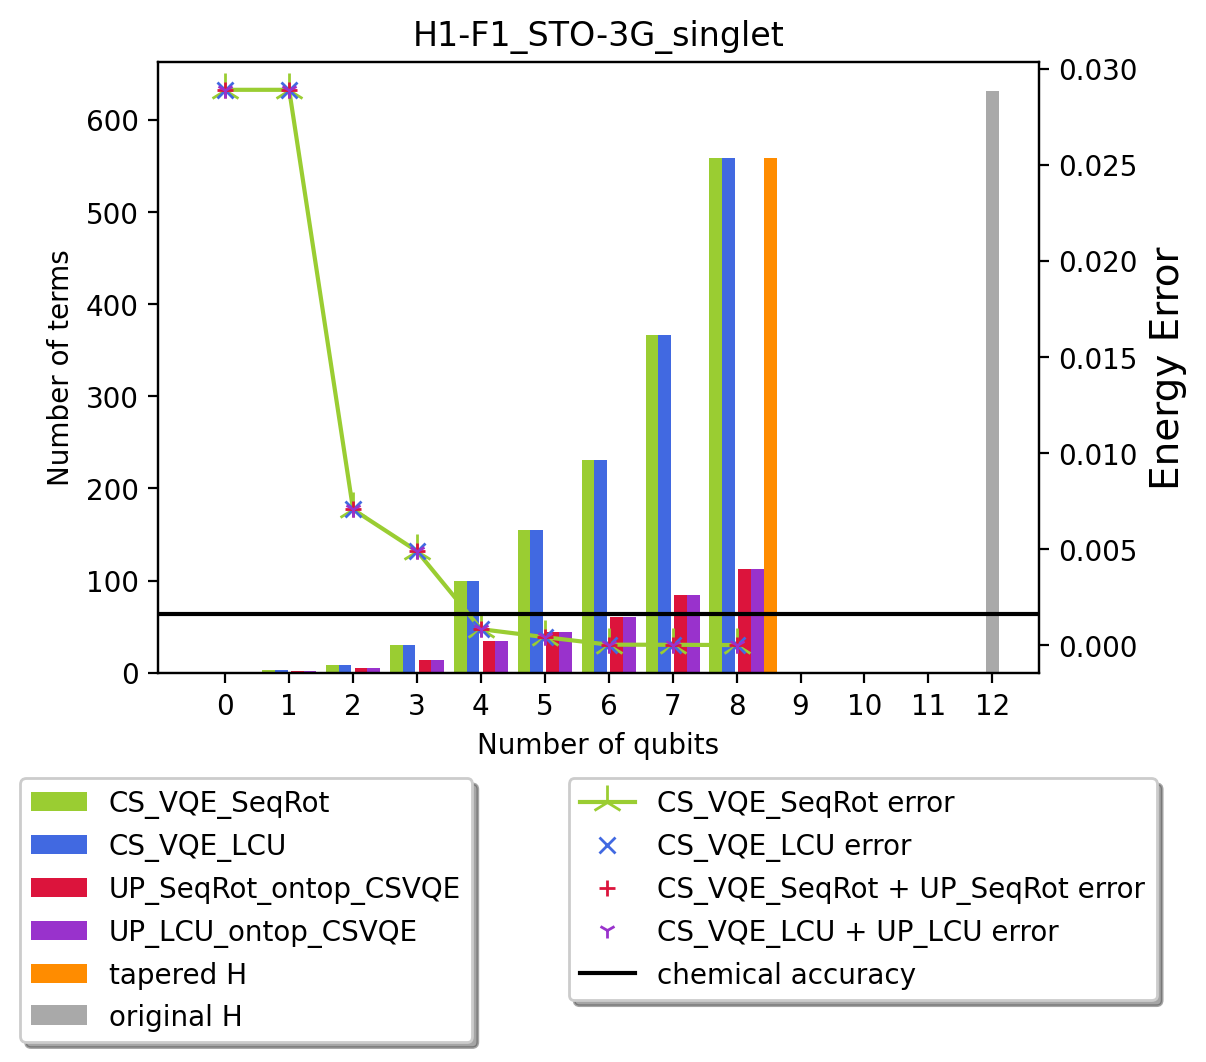

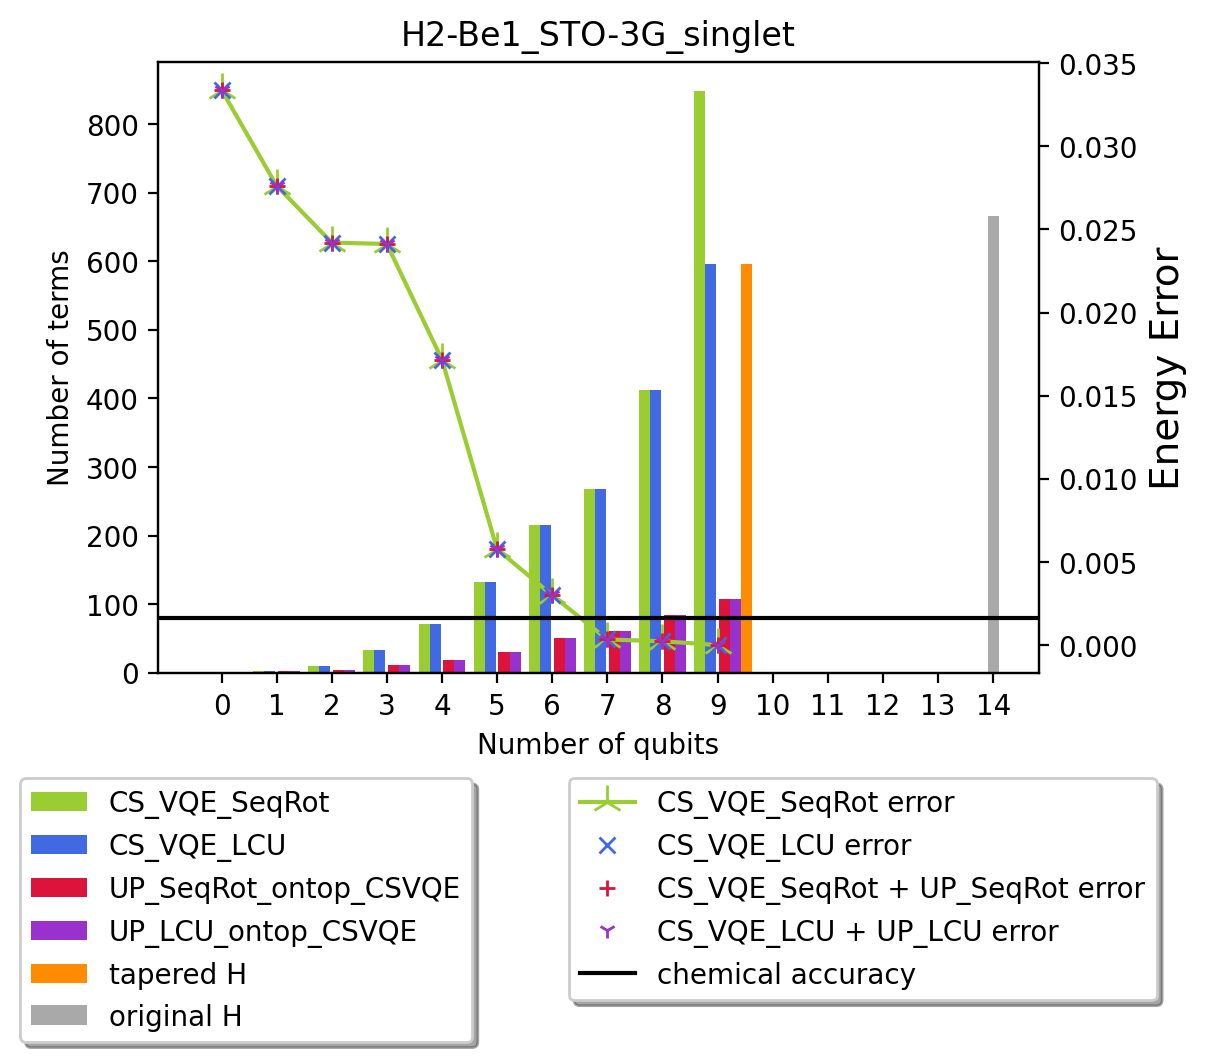

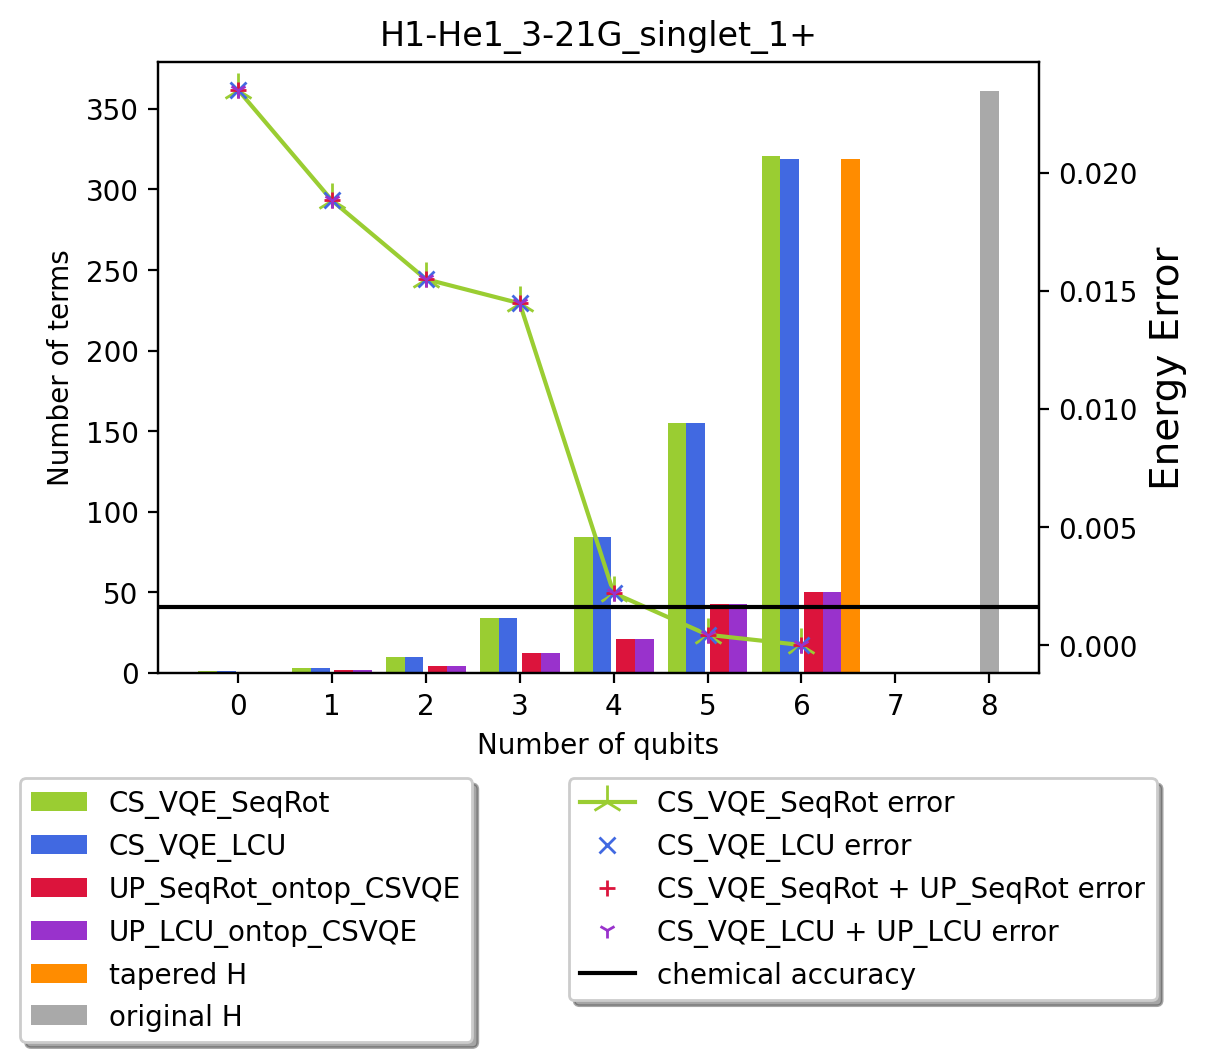

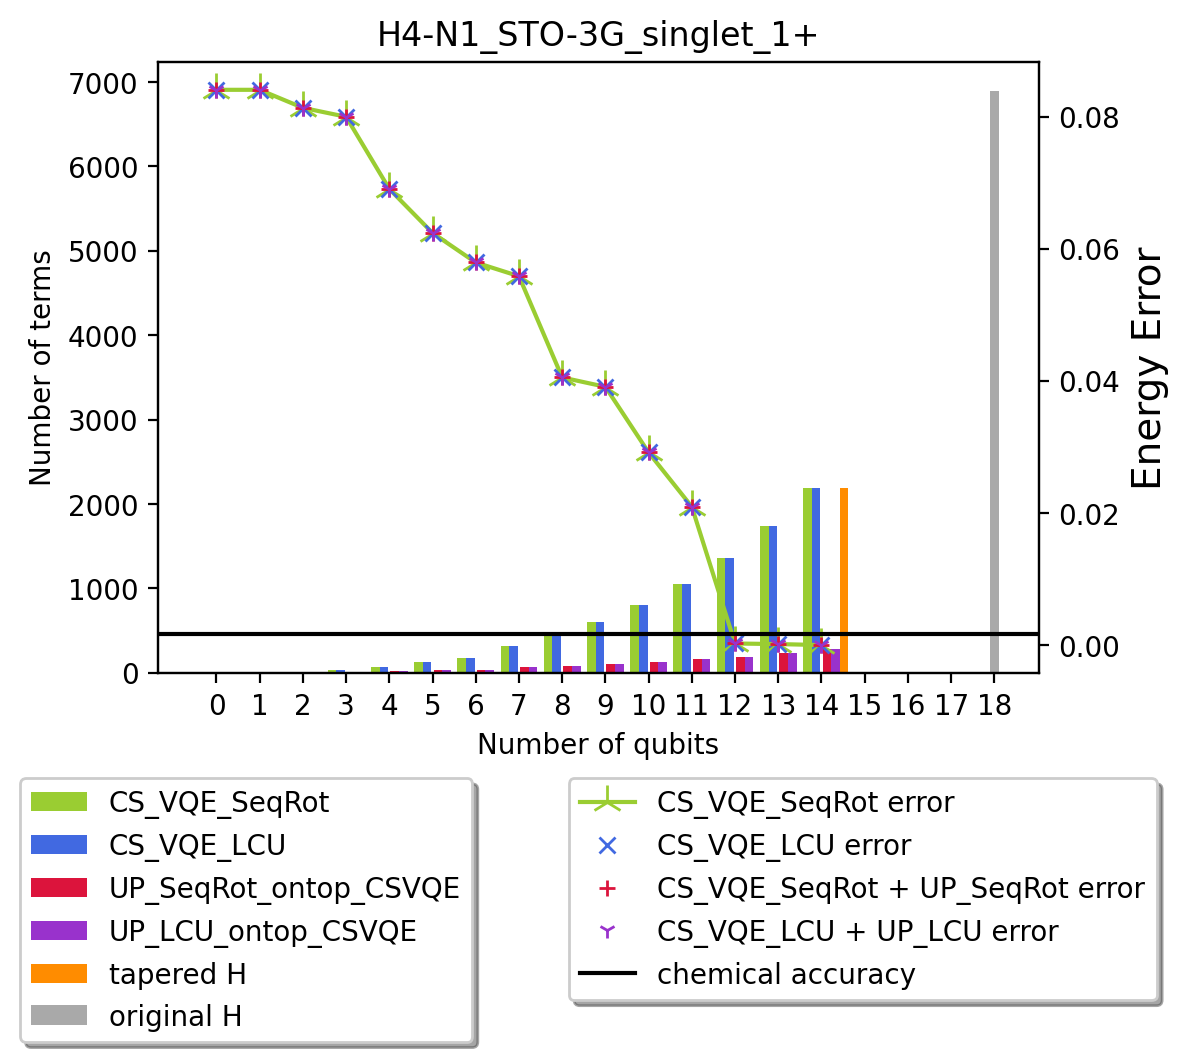

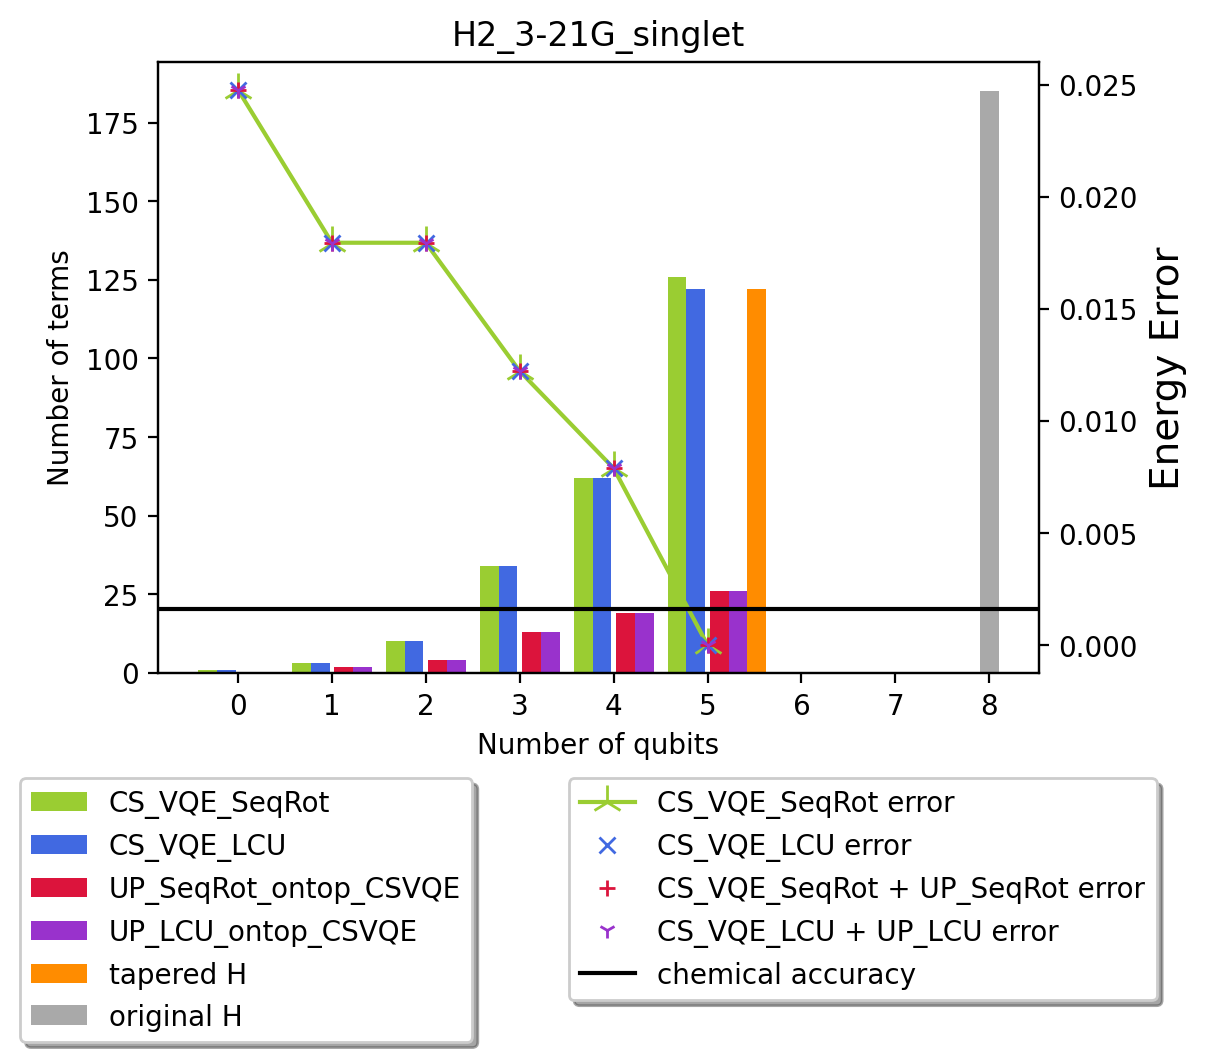

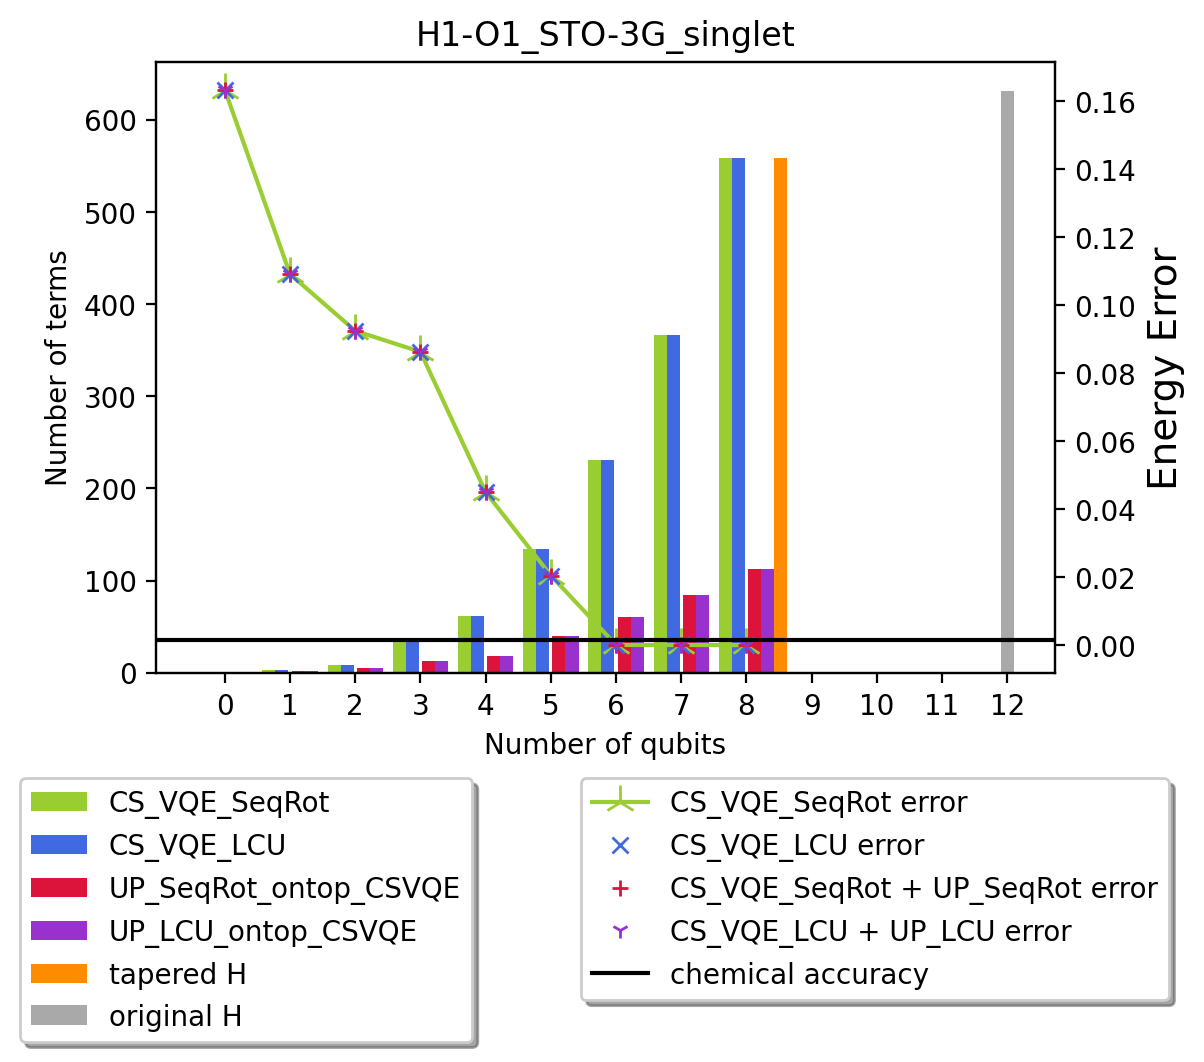

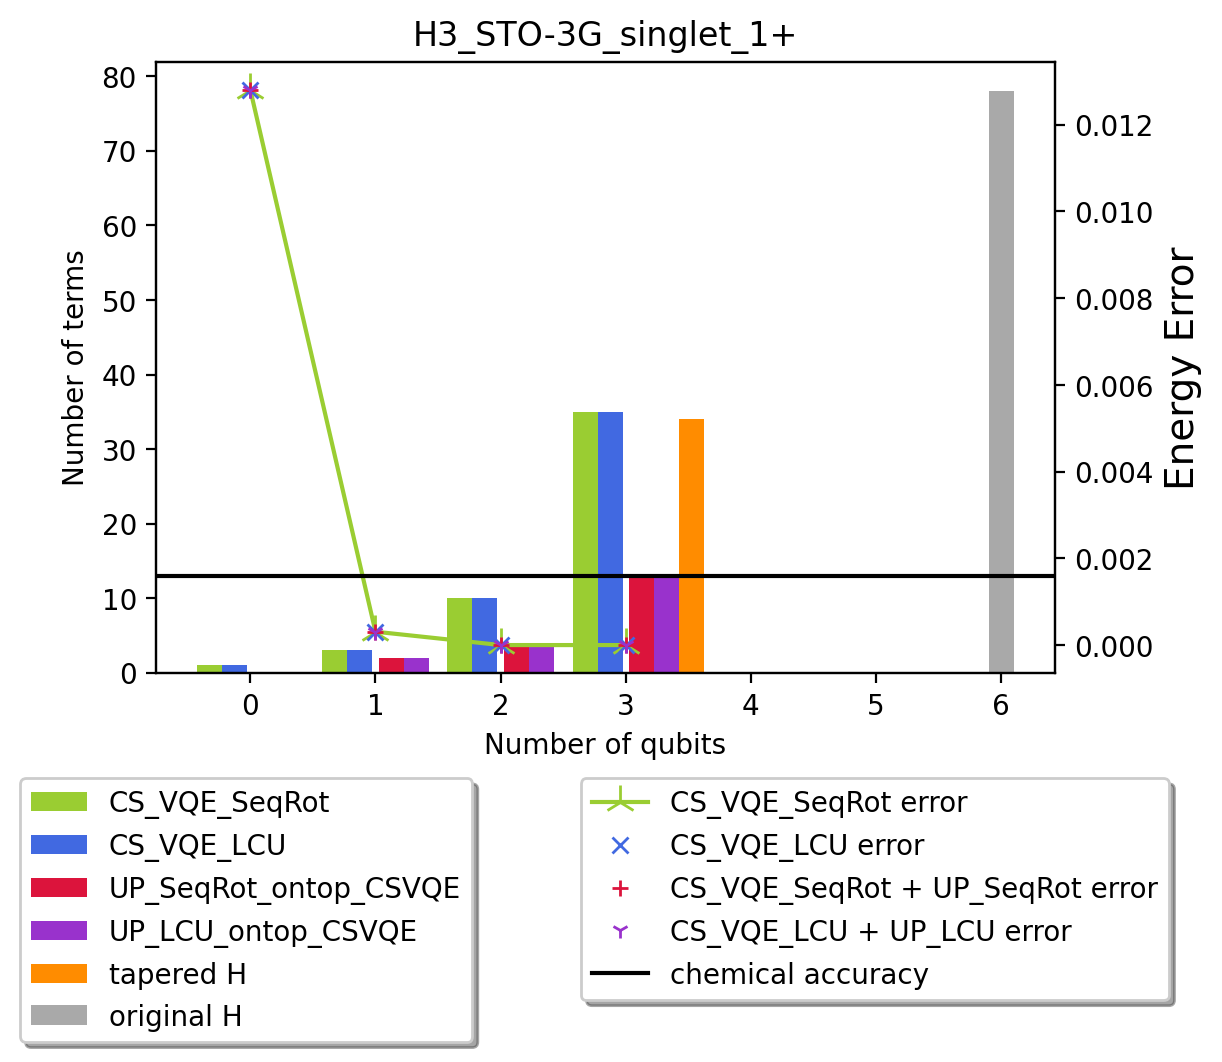

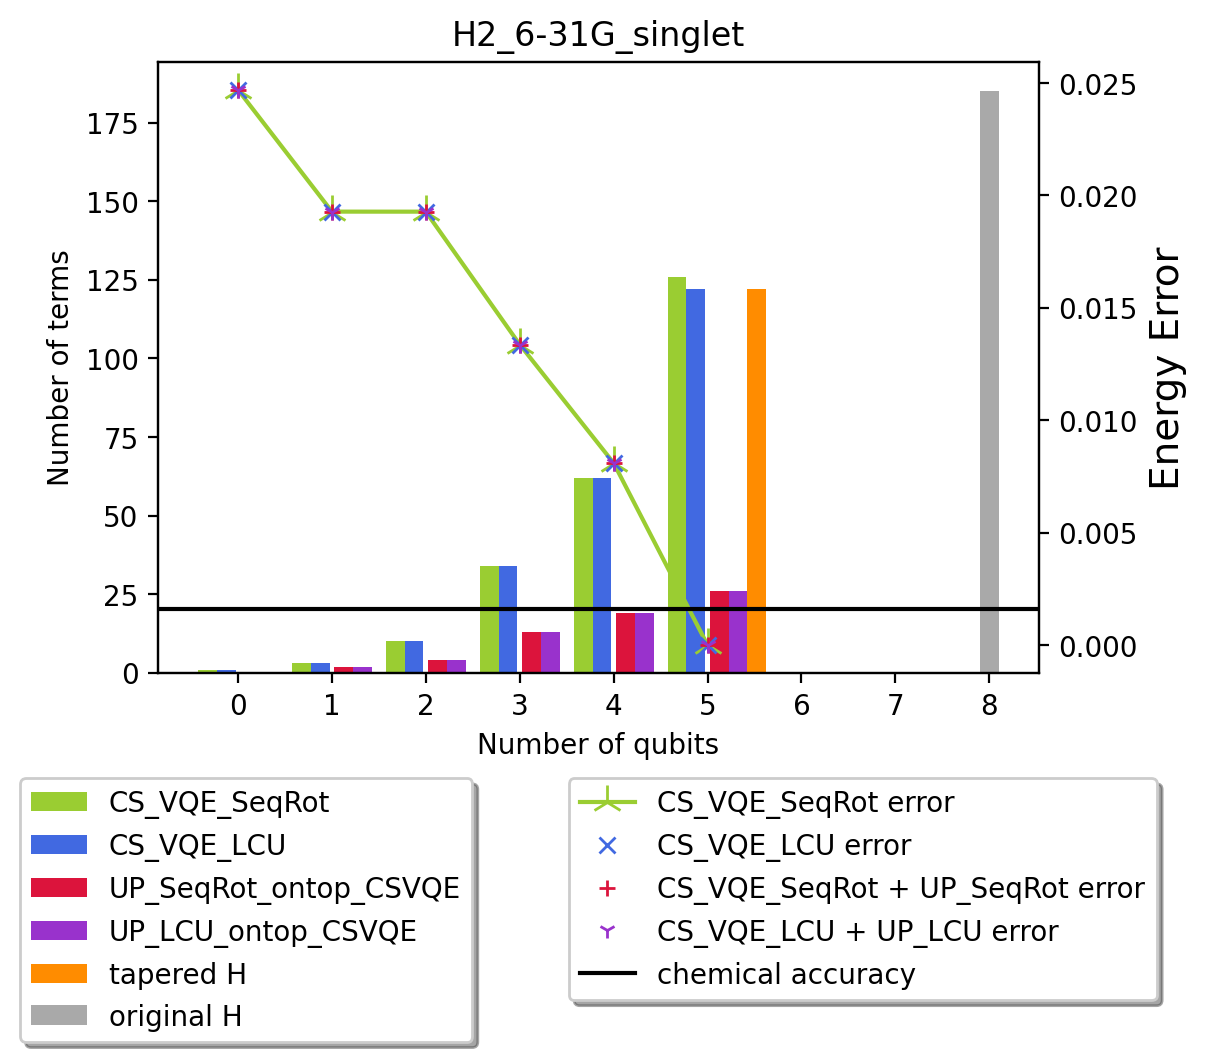

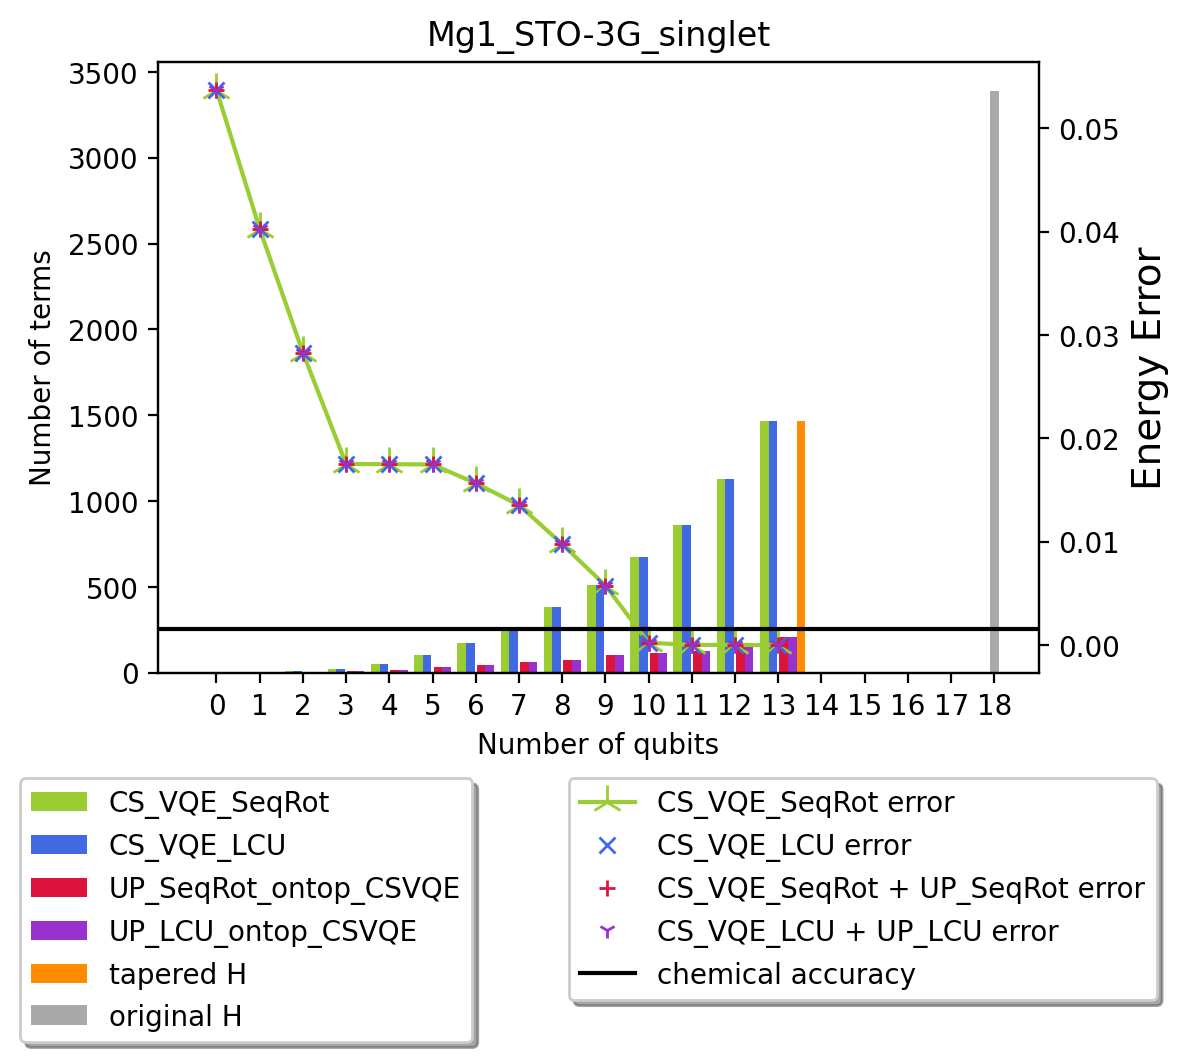

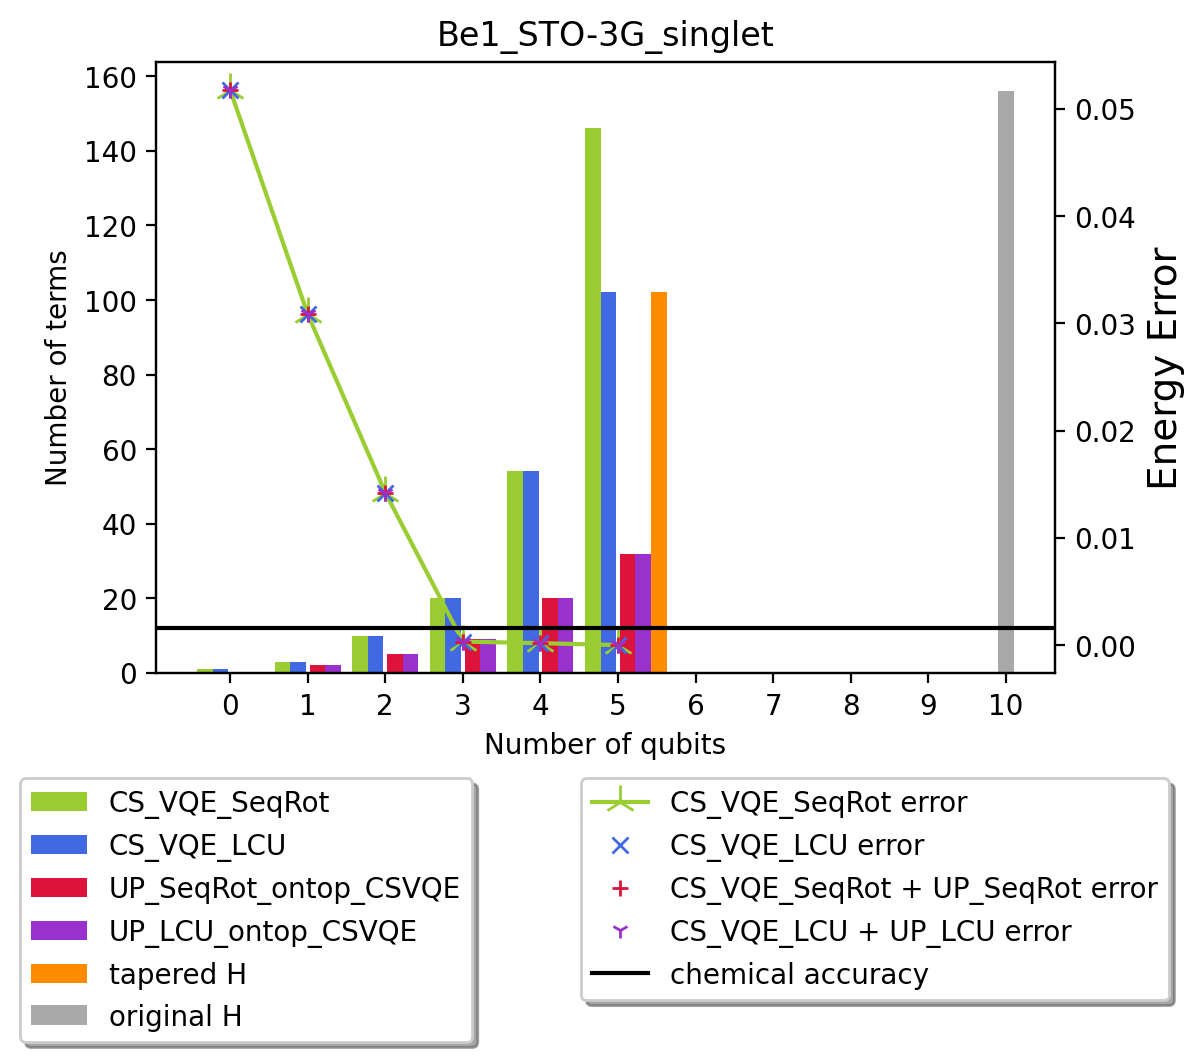

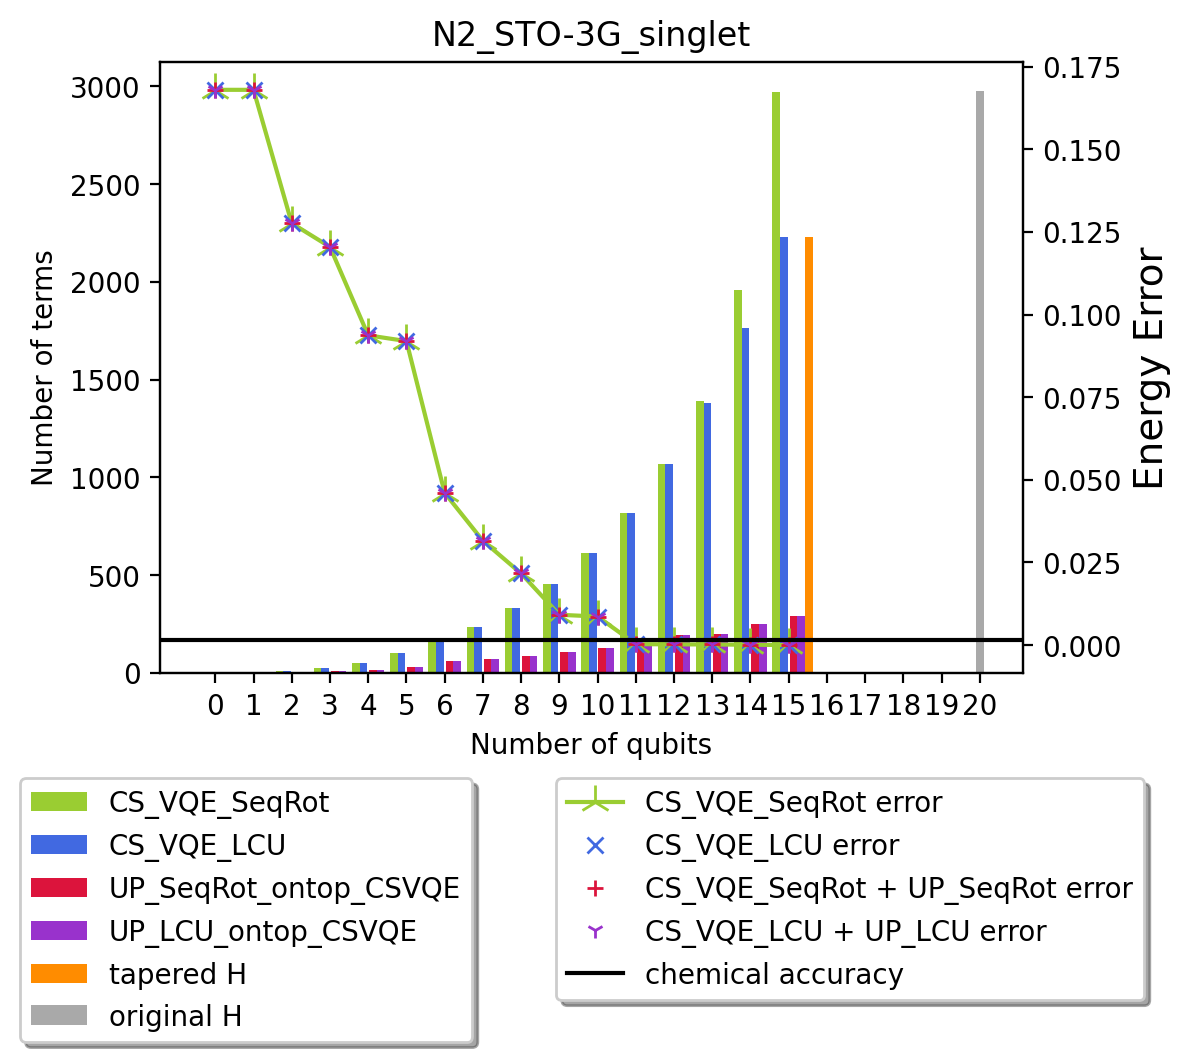

In [318]:
for molecule in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                       molecule,
                       dpi=200)

In [290]:
import sys 
sys.path.append('..') # allows bellow import!
import cs_vqe as c 

H_reduced = myriad_CS_VQE_SeqRot_results['H3_3-21G_singlet_1+'][6]['H']

# find con and noncon
nonH_guesses = c.greedy_dfs(H_reduced, 10, criterion='weight')
nonH = max(nonH_guesses, key=lambda x:len(x)) # largest nonCon part found by dfs alg

In [294]:
len(H_reduced) - len(nonH)

213

In [296]:
nonCon_H = {}
Con_H = {}

for P in H_reduced:
    if P in nonH:
        nonCon_H[P]=H_reduced[P]
    else:
        Con_H[P]=H_reduced[P]
        

In [311]:
import conversion_scripts as conv_scr
from openfermion import qubit_operator_sparse
from scipy.linalg import eigh

nq = len(list(Con_H.keys())[0])

H_con = conv_scr.Get_Openfermion_Hamiltonian(Con_H)
sparseH_con = qubit_operator_sparse(H_con, n_qubits=nq)
# E_con = min(np.linalg.eigvalsh(sparseH_con.todense()))
eig_values_CON, eig_vectors_CON = eigh(sparseH_con.todense())
E_con= min(eig_values_CON)

H_noncon = conv_scr.Get_Openfermion_Hamiltonian(nonCon_H)
sparseH_noncon = qubit_operator_sparse(H_noncon, n_qubits=nq)
# E_noncon = min(np.linalg.eigvalsh(sparseH_noncon.todense()))
eig_values_NONCON, eig_vectors_NONCON = eigh(sparseH_noncon.todense())
E_noncon= min(eig_values_NONCON)

E_noncon+E_con

-3.7115563324880325

In [321]:
#True gs
myriad_CS_VQE_SeqRot_results['H3_3-21G_singlet_1+'][6]['E']

-3.1647707848251136

Cannot just treat con and non parts seperately... as ground states won't be consistent!

In [320]:
min(np.linalg.eigvalsh((sparseH_noncon+sparseH_con).todense())) # including both parts is correct

-3.164770784825116